In [1]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics

In [2]:
df = pd.read_csv('energydata_complete.csv')

In [3]:
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= df.date  ,  mode = "markers", y = df.Appliances )
layout = go.Layout(title = 'Date vs Appliances' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [4]:
# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= df.date  ,  mode = "markers", y = df.lights )
layout = go.Layout(title = 'Date vs lights' , xaxis=dict(title='Date'), yaxis=dict(title='(count)'))
fig2 = go.Figure(data=[visData],layout=layout)

iplot(fig2)

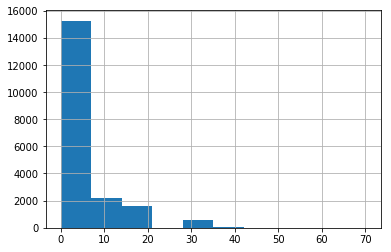

In [5]:
df.lights.hist()

In [6]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
#Create group
bins = [0, 60,120,1200]
names = ['Low', 'Medium', 'High']

df['Energy_level'] = pd.cut(df['Appliances'], bins, labels=names)

print(df.dtypes)

date              object
Appliances         int64
lights             int64
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
Energy_level    category
dtype: object


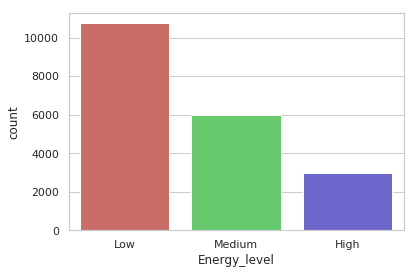

In [8]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
 
#draw histogram plot
sns.countplot(x = 'Energy_level', data = df, palette = 'hls')
plt.show()

In [9]:
data2 =df.rename(columns={'Appliances':'Appliances',
                            'lights':'Lights',
                                    'RH_1':'Humidity_in_kitchen_area,in%',
                                    'RH_2': 'Humidity_in_living_room_area,in%',
                                    'RH_3':'Humidity_in_laundry_room_area,in%',
                                    'RH_4':'Humidity_in_office_room,in%',
                            'RH_5':'Humidity in bathroom,in %',
                            'RH_6':'Humidity_outside_the_building(north_side),in %',
                            
                                    'RH_7':'Humidity_in_ironing_room,in%',
                                    'RH_8':'Humidity_in_teenager_room_2,in%',
                                    'RH_9':'Humidity_in_parents_room,in%',
                                    'RH_out':'Humidity_outside(from_Chievres_weather_station),in%',
                                    'T1':'Temperature_in_kitchen_area,in_Celsius',
                                    'T2':'Temperature_in_living_room_area,in_Celsius',
                                    'T3':'Temperature_in_laundry_room_area',
                                    'T4':'Temperature_in_office_room,in_Celsius',
                                    'T5':'Temperature_in_bathroom,in_Celsius',
                                    'T6':'Temperature_outside_the_building(north side),in_Celsius',
                                    'T7':'Temperature_in_ironing_room,in_Celsius',
                                    'T8':'Temperature_in_teenager_room_2,in_Celsius',
                                    'T9':'Temperature_in_parents_room,in_Celsius',
                                    'T_out':'Humidity_outside(from_Chievres_weather_station),in %',
                                    'Tdewpoint':'(from_Chievres_weather_station),°C',
                            'Visibility':'Visibility(from_Chievres_weather_station),in_km',
                            'rv1':'rv1,Random_variable_1,nondimensional',
                            'rv2':'rv2,Random_variable_2,nondimensional'
                                   })
data2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
date                                                       19735 non-null object
Appliances                                                 19735 non-null int64
Lights                                                     19735 non-null int64
Temperature_in_kitchen_area,in_Celsius                     19735 non-null float64
Humidity_in_kitchen_area,in%                               19735 non-null float64
Temperature_in_living_room_area,in_Celsius                 19735 non-null float64
Humidity_in_living_room_area,in%                           19735 non-null float64
Temperature_in_laundry_room_area                           19735 non-null float64
Humidity_in_laundry_room_area,in%                          19735 non-null float64
Temperature_in_office_room,in_Celsius                      19735 non-null float64
Humidity_in_office_room,in%                                19735 non-null fl

In [10]:
#apple log
to_log = ['Appliances',
          'Lights',
          'Humidity_in_kitchen_area,in%',
          'Humidity_in_living_room_area,in%',
          'Humidity_in_laundry_room_area,in%',
          'Humidity_in_office_room,in%',
          'Humidity in bathroom,in %',
          'Humidity_outside_the_building(north_side),in %',
          'Humidity_in_ironing_room,in%',
          'Humidity_in_teenager_room_2,in%',
          'Humidity_in_parents_room,in%',
          'Humidity_outside(from_Chievres_weather_station),in%',
          'Temperature_in_kitchen_area,in_Celsius',
          'Temperature_in_living_room_area,in_Celsius',
          'Temperature_in_laundry_room_area',
          'Temperature_in_office_room,in_Celsius',
          'Temperature_in_bathroom,in_Celsius',
          'Temperature_outside_the_building(north side),in_Celsius',
          'Temperature_in_ironing_room,in_Celsius',
          'Temperature_in_teenager_room_2,in_Celsius',
          'Temperature_in_parents_room,in_Celsius',
          'Humidity_outside(from_Chievres_weather_station),in %',
          '(from_Chievres_weather_station),°C',
          'Visibility(from_Chievres_weather_station),in_km',
          'rv1,Random_variable_1,nondimensional',
          'rv2,Random_variable_2,nondimensional'
         ]
data2_log = data2[to_log].applymap(lambda x: np.log(x+1))

# rename columns
data2_log.columns = 'log_' + data2_log.columns

# shift the index
data2_log.index = data2_log.index + 1

In [11]:
data2.info

<bound method DataFrame.info of                       date  Appliances  Lights  \
0      2016-01-11 17:00:00          60      30   
1      2016-01-11 17:10:00          60      30   
2      2016-01-11 17:20:00          50      30   
3      2016-01-11 17:30:00          50      40   
4      2016-01-11 17:40:00          60      40   
5      2016-01-11 17:50:00          50      40   
6      2016-01-11 18:00:00          60      50   
7      2016-01-11 18:10:00          60      50   
8      2016-01-11 18:20:00          60      40   
9      2016-01-11 18:30:00          70      40   
10     2016-01-11 18:40:00         230      70   
11     2016-01-11 18:50:00         580      60   
12     2016-01-11 19:00:00         430      50   
13     2016-01-11 19:10:00         250      40   
14     2016-01-11 19:20:00         100      10   
15     2016-01-11 19:30:00         100      10   
16     2016-01-11 19:40:00          90      10   
17     2016-01-11 19:50:00          70      30   
18     2016-01-11 

In [12]:
data3 = data2.drop( columns= ['rv1,Random_variable_1,nondimensional',
                          'rv1,Random_variable_1,nondimensional',
                          'rv2,Random_variable_2,nondimensional',
                          'Humidity_in_living_room_area,in%',
                          'Humidity_outside_the_building(north_side),in %',
                          'Temperature_in_ironing_room,in_Celsius',
                          'Humidity_in_teenager_room_2,in%',
                          'Humidity_in_parents_room,in%',
                          'Humidity_outside(from_Chievres_weather_station),in%',
                          'Visibility(from_Chievres_weather_station),in_km',])

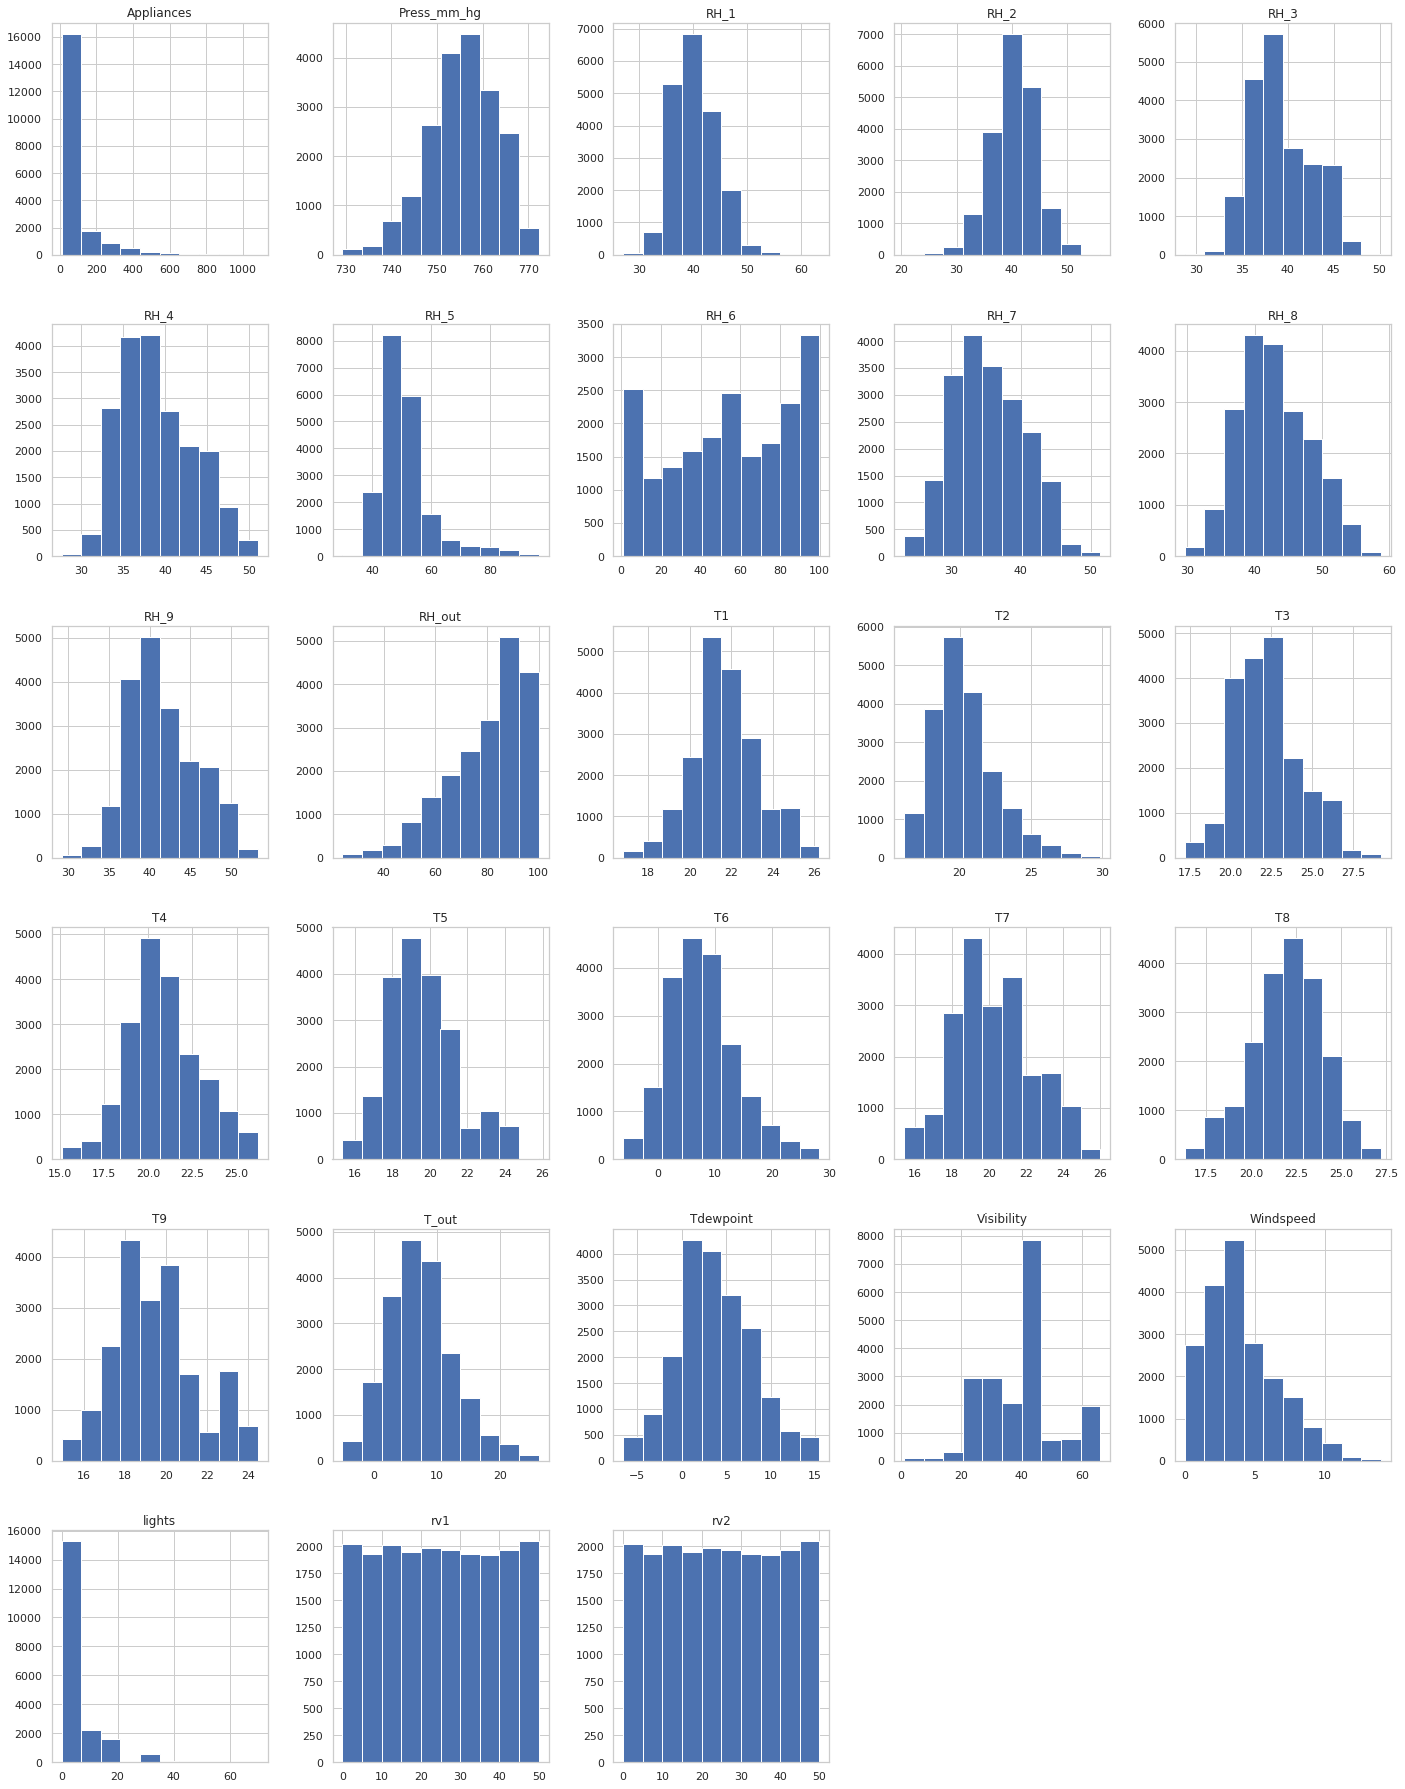

In [13]:
df.hist( figsize= (24,32));

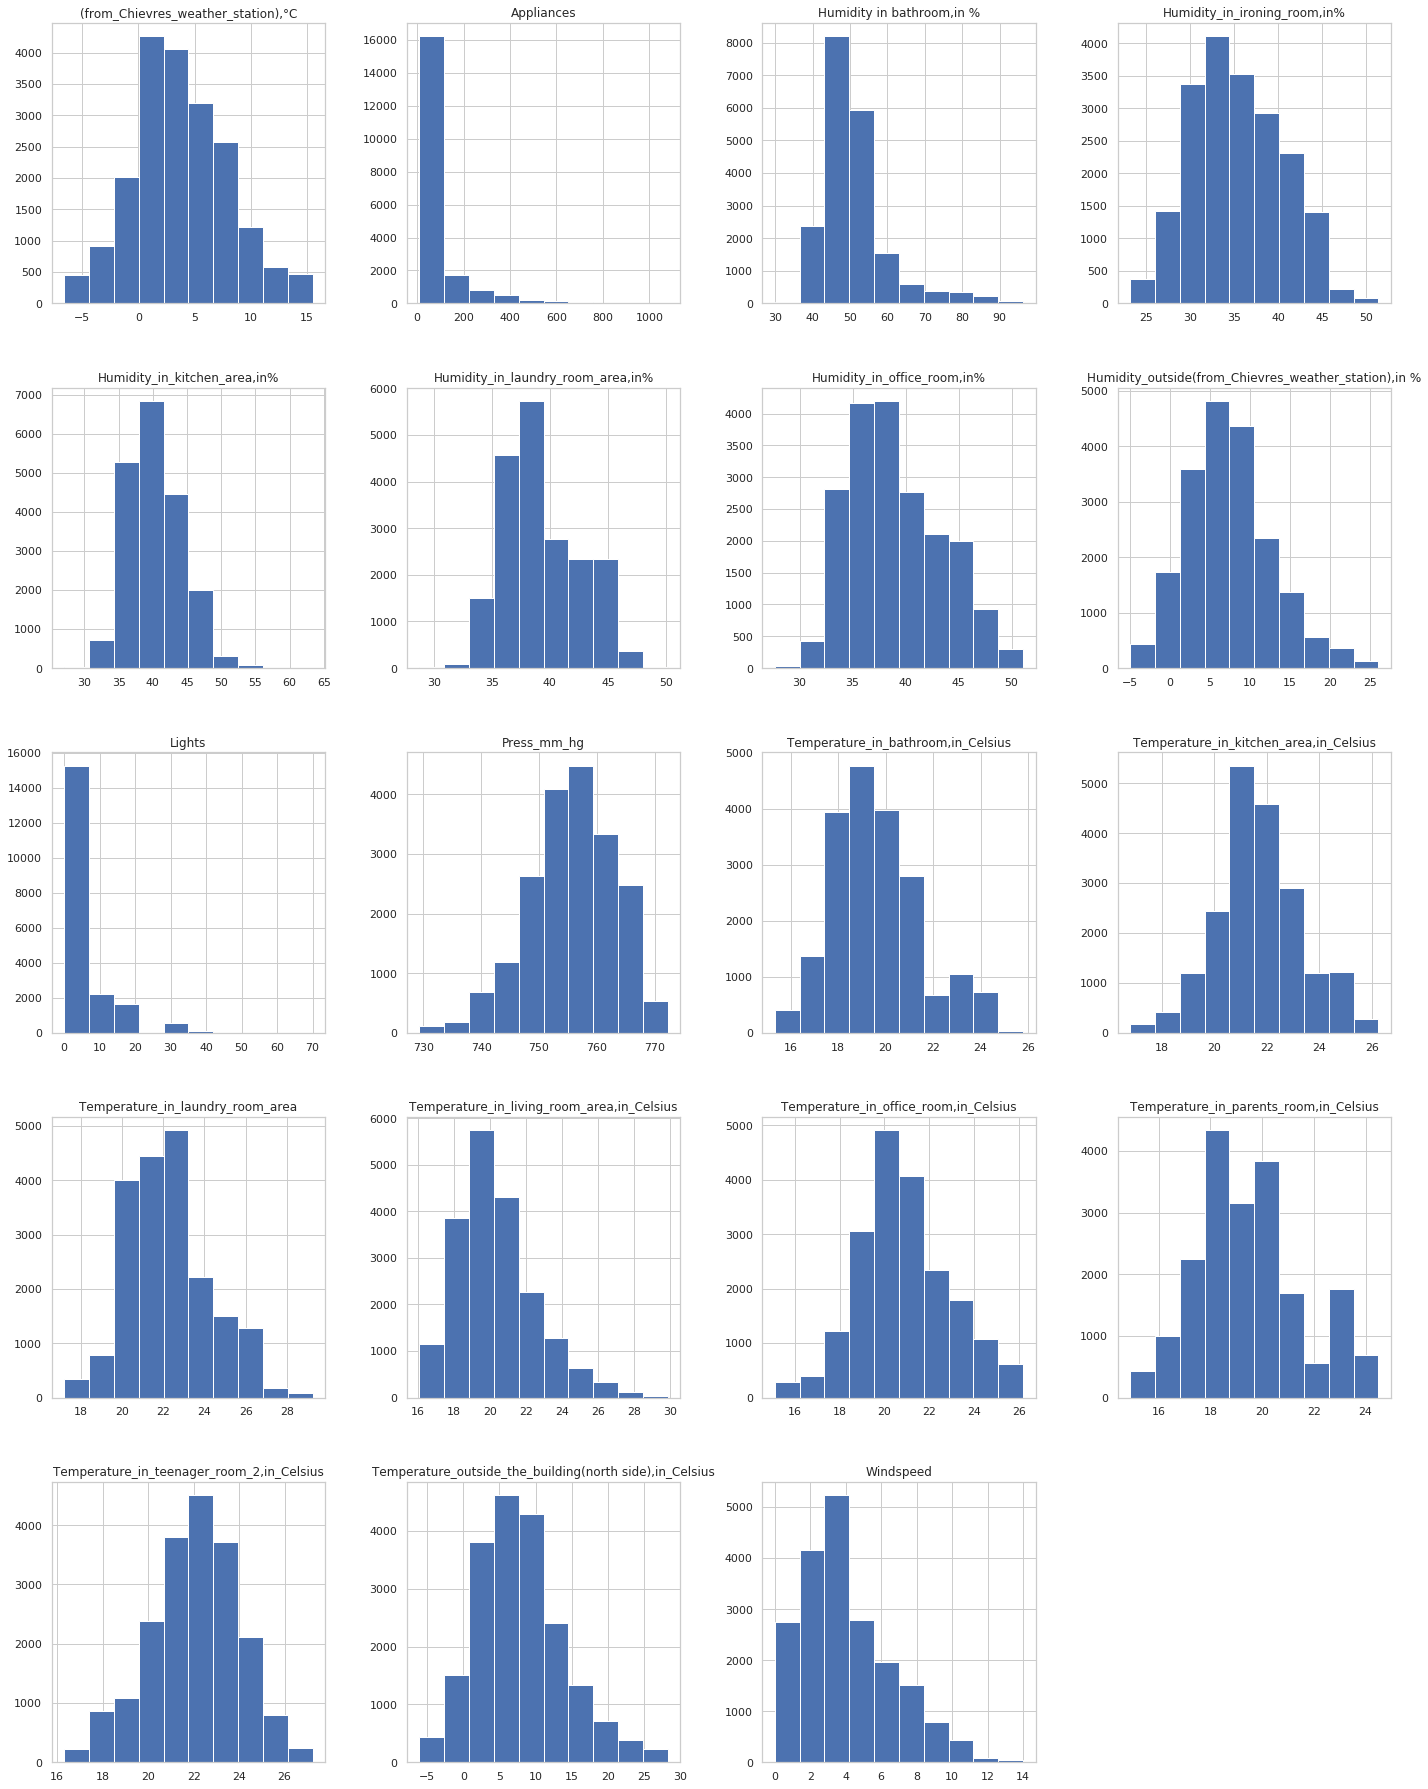

In [14]:
data3.hist( figsize= (24,32));

In [15]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('operations').getOrCreate()
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import col
from pyspark.sql import SQLContext

In [16]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
spark = SparkSession.builder.appName('pandasToSparkDF').getOrCreate()

In [17]:
from pyspark.sql.types import *

mySchema = StructType([ StructField("date", LongType (), False)\
                       ,StructField("Lights", IntegerType (), False)\
                       ,StructField("Humidity_in_kitchen_area", IntegerType (), False)\
        
                       ,StructField("Humidity_in_laundry_room_area,in%", IntegerType (), False)\
                       ,StructField("Humidity_in_office_room,in%", IntegerType (), False)\
                       ,StructField("Humidity in bathroom,in %", IntegerType (), False)\
                       
                       ,StructField("Humidity_in_ironing_room,in%", IntegerType (), False)\
                       
                       
                       
                       ,StructField("Temperature_in_kitchen_area,in_Celsius", IntegerType (), False)\
                       ,StructField("Temperature_in_living_room_area,in_Celsius", IntegerType (), False)\
                       ,StructField("Temperature_in_laundry_room_area", IntegerType (), False)\
                       ,StructField("Temperature_in_office_room,in_Celsius", IntegerType (), False)\
                       ,StructField("Temperature_in_bathroom,in_Celsius", IntegerType (), False)\
                       ,StructField("Temperature_outside_the_building(north side),in_Celsius", IntegerType (), False)\
                       
                       ,StructField("Temperature_in_teenager_room_2,in_Celsius", IntegerType (), False)\
                       ,StructField("Temperature_in_parents_room,in_Celsius", IntegerType (), False)\
                       ,StructField("Humidity_outside(from_Chievres_weather_station),in %", IntegerType (), False)\
                       ,StructField("(from_Chievres_weather_station),°C", IntegerType (), False)\
                       ,StructField("Visibility(from_Chievres_weather_station),in_km", IntegerType (), False)])

In [18]:
spark = SparkSession.builder.getOrCreate()
sdata= spark.createDataFrame(data3)

In [19]:
sdata.show()

+-------------------+----------+------+--------------------------------------+----------------------------+------------------------------------------+--------------------------------+---------------------------------+-------------------------------------+---------------------------+----------------------------------+-------------------------+-------------------------------------------------------+----------------------------+-----------------------------------------+--------------------------------------+----------------------------------------------------+-----------------+------------------+----------------------------------+------------+
|               date|Appliances|Lights|Temperature_in_kitchen_area,in_Celsius|Humidity_in_kitchen_area,in%|Temperature_in_living_room_area,in_Celsius|Temperature_in_laundry_room_area|Humidity_in_laundry_room_area,in%|Temperature_in_office_room,in_Celsius|Humidity_in_office_room,in%|Temperature_in_bathroom,in_Celsius|Humidity in bathroom,in %|Tempera

In [20]:
sdata.printSchema()

root
 |-- date: string (nullable = true)
 |-- Appliances: long (nullable = true)
 |-- Lights: long (nullable = true)
 |-- Temperature_in_kitchen_area,in_Celsius: double (nullable = true)
 |-- Humidity_in_kitchen_area,in%: double (nullable = true)
 |-- Temperature_in_living_room_area,in_Celsius: double (nullable = true)
 |-- Temperature_in_laundry_room_area: double (nullable = true)
 |-- Humidity_in_laundry_room_area,in%: double (nullable = true)
 |-- Temperature_in_office_room,in_Celsius: double (nullable = true)
 |-- Humidity_in_office_room,in%: double (nullable = true)
 |-- Temperature_in_bathroom,in_Celsius: double (nullable = true)
 |-- Humidity in bathroom,in %: double (nullable = true)
 |-- Temperature_outside_the_building(north side),in_Celsius: double (nullable = true)
 |-- Humidity_in_ironing_room,in%: double (nullable = true)
 |-- Temperature_in_teenager_room_2,in_Celsius: double (nullable = true)
 |-- Temperature_in_parents_room,in_Celsius: double (nullable = true)
 |-- Humi

In [21]:
from pyspark.sql.types import TimestampType
sdata2 = sdata.withColumn("date", sdata["date"].cast(TimestampType()))


In [22]:
sdata2.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- Appliances: long (nullable = true)
 |-- Lights: long (nullable = true)
 |-- Temperature_in_kitchen_area,in_Celsius: double (nullable = true)
 |-- Humidity_in_kitchen_area,in%: double (nullable = true)
 |-- Temperature_in_living_room_area,in_Celsius: double (nullable = true)
 |-- Temperature_in_laundry_room_area: double (nullable = true)
 |-- Humidity_in_laundry_room_area,in%: double (nullable = true)
 |-- Temperature_in_office_room,in_Celsius: double (nullable = true)
 |-- Humidity_in_office_room,in%: double (nullable = true)
 |-- Temperature_in_bathroom,in_Celsius: double (nullable = true)
 |-- Humidity in bathroom,in %: double (nullable = true)
 |-- Temperature_outside_the_building(north side),in_Celsius: double (nullable = true)
 |-- Humidity_in_ironing_room,in%: double (nullable = true)
 |-- Temperature_in_teenager_room_2,in_Celsius: double (nullable = true)
 |-- Temperature_in_parents_room,in_Celsius: double (nullable = true)
 |-- H

In [23]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=[ 
               "Lights", 
               "Temperature_in_kitchen_area,in_Celsius",
              "Humidity_in_kitchen_area,in%",
              "Temperature_in_living_room_area,in_Celsius",
              "Temperature_in_laundry_room_area",
              "Humidity_in_laundry_room_area,in%",
              "Temperature_in_office_room,in_Celsius",
              "Humidity_in_office_room,in%",
              "Temperature_in_bathroom,in_Celsius",
              "Humidity in bathroom,in %",
              "Temperature_outside_the_building(north side),in_Celsius",
              "Humidity_in_ironing_room,in%",
              "Temperature_in_teenager_room_2,in_Celsius",
              "Temperature_in_parents_room,in_Celsius",
              "Humidity_outside(from_Chievres_weather_station),in %",
              "Press_mm_hg",
              "Windspeed",
              "(from_Chievres_weather_station),°C",
              ],
    outputCol="features")

output = assembler.transform(sdata2)
output.select("Appliances", "features").show(truncate=False)

+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Appliances|features                                                                                                                                                                                                                                       |
+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|60        |[30.0,19.89,47.5966666666667,19.2,19.79,44.73,19.0,45.5666666666667,17.1666666666667,55.2,7.026666666666671,41.6266666666667,18.2,17.033333333333303,6.6,733.5,7.0,5.3]                                                              

In [24]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_docs').getOrCreate()
from pyspark.ml.regression import LinearRegression

In [25]:
# These are the default values:
# featuresCol: What is the features column named? 
# labelCol: What is the label column named?
# predictionCol: What is the name of the actual prediction?
lr = LinearRegression(featuresCol='features', labelCol='Appliances', predictionCol='prediction')

In [26]:
# Fit/train the model. Fit the model onto the training data.
lrModel = lr.fit(output)

In [27]:
# Print the coefficients and intercept for linear regression
print("Coefficients: {}".format(str(lrModel.coefficients))) # For each feature...
print('\n')
print("Intercept:{}".format(str(lrModel.intercept)))

Coefficients: [2.3543922143106557,-10.145466879850073,8.019902274943233,6.393521641154957,22.385300265408663,1.9742697850239461,-6.6509599911473485,-4.533456364287023,-1.723435917395138,0.002708538342807187,5.956021529423059,-4.218569501191942,7.740451884031155,-18.6825702792538,-3.2047160290369594,0.07697449263361225,2.0152874847507327,-2.989544453600147]


Intercept:-106.44907140108255


In [28]:
# Summarize the model over the training set and print out some metrics.
trainingSummary = lrModel.summary

In [29]:
trainingSummary.residuals.show()

# Print Root Mean Squared Error. 
print("RMSE: {}".format(trainingSummary.rootMeanSquaredError))

# Print R-Squared.
print("r2: {}".format(trainingSummary.r2))

+-------------------+
|          residuals|
+-------------------+
| -98.26875593872131|
| -87.72783130050698|
| -95.96908401950913|
|-117.85771819398929|
|-110.68019817169329|
|-116.78233318047484|
| -128.0040403309763|
|-124.90967581350657|
|-101.44016806591367|
| -95.43058254239088|
| 1.8932760606219858|
|   377.792900322578|
|  241.7952021964748|
| 52.174485681340286|
| -54.67371025545822|
|-45.152236350003534|
|-52.016170783301845|
| -129.2785442139849|
| -98.01105869185704|
| -46.58121688691841|
+-------------------+
only showing top 20 rows

RMSE: 94.97509425703576
r2: 0.14181119522193208


In [30]:
# Pass in the split between training/test as a list.
# This is based on your test-designs, but generally 70/30 or 60/40 splits are used. 
# Depending on how much data you have and how unbalanced it is.
train_data,test_data = output.randomSplit([0.7,0.3])

In [31]:
# Let's check out our training data.
train_data.show(1)
# Let's check out the count (348).
train_data.describe().show()

+--------------------+----------+------+--------------------------------------+----------------------------+------------------------------------------+--------------------------------+---------------------------------+-------------------------------------+---------------------------+----------------------------------+-------------------------+-------------------------------------------------------+----------------------------+-----------------------------------------+--------------------------------------+----------------------------------------------------+-----------+------------------+----------------------------------+------------+--------------------+
|                date|Appliances|Lights|Temperature_in_kitchen_area,in_Celsius|Humidity_in_kitchen_area,in%|Temperature_in_living_room_area,in_Celsius|Temperature_in_laundry_room_area|Humidity_in_laundry_room_area,in%|Temperature_in_office_room,in_Celsius|Humidity_in_office_room,in%|Temperature_in_bathroom,in_Celsius|Humidity in bath

In [32]:
# And our test data. 
test_data.show()

# Let's check out the count (153, approximately a 70/30 split).
test_data.describe().show()

+--------------------+----------+------+--------------------------------------+----------------------------+------------------------------------------+--------------------------------+---------------------------------+-------------------------------------+---------------------------+----------------------------------+-------------------------+-------------------------------------------------------+----------------------------+-----------------------------------------+--------------------------------------+----------------------------------------------------+-----------------+------------------+----------------------------------+------------+--------------------+
|                date|Appliances|Lights|Temperature_in_kitchen_area,in_Celsius|Humidity_in_kitchen_area,in%|Temperature_in_living_room_area,in_Celsius|Temperature_in_laundry_room_area|Humidity_in_laundry_room_area,in%|Temperature_in_office_room,in_Celsius|Humidity_in_office_room,in%|Temperature_in_bathroom,in_Celsius|Humidity i

+-------+------------------+------------------+--------------------------------------+----------------------------+------------------------------------------+--------------------------------+---------------------------------+-------------------------------------+---------------------------+----------------------------------+-------------------------+-------------------------------------------------------+----------------------------+-----------------------------------------+--------------------------------------+----------------------------------------------------+-----------------+------------------+----------------------------------+------------+
|summary|        Appliances|            Lights|Temperature_in_kitchen_area,in_Celsius|Humidity_in_kitchen_area,in%|Temperature_in_living_room_area,in_Celsius|Temperature_in_laundry_room_area|Humidity_in_laundry_room_area,in%|Temperature_in_office_room,in_Celsius|Humidity_in_office_room,in%|Temperature_in_bathroom,in_Celsius|Humidity in bathr

In [33]:
# Now we only train the train_data.
correct_model = lr.fit(train_data)

In [34]:
# Now we can directly get a .summary object using the evaluate method.
test_results = correct_model.evaluate(test_data)

In [35]:
# And generate some basic evaluation metrics. 
test_results.residuals.show()
print("RMSE: {}".format(test_results.rootMeanSquaredError))

+-------------------+
|          residuals|
+-------------------+
|  -91.8856812244097|
|  -81.0182401685615|
|-110.04733420686708|
| -103.0780378221202|
| -87.45580756886275|
| 388.50107910180225|
| -49.17337742916155|
|-124.29462195294386|
| 1.0672720119044925|
| -6.286709466252631|
|  7.591124591573276|
| 293.31887785558075|
| 293.73864507119845|
| 138.84222462209507|
| -35.54797618395173|
| -34.45930493827393|
| -49.73625388671573|
| -27.80823771635687|
|  300.6944085957803|
|  68.82823107855222|
+-------------------+
only showing top 20 rows

RMSE: 98.47810958453722


In [36]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=[ 
               "Lights", 
               "Temperature_in_kitchen_area,in_Celsius",
              
              "Temperature_in_living_room_area,in_Celsius",
              "Temperature_in_laundry_room_area",
              
              "Temperature_in_office_room,in_Celsius",
              
              "Temperature_in_bathroom,in_Celsius",
              
              "Temperature_outside_the_building(north side),in_Celsius",
              
              "Temperature_in_teenager_room_2,in_Celsius",
              "Temperature_in_parents_room,in_Celsius",
              
              "Press_mm_hg",
              "Windspeed",
              "(from_Chievres_weather_station),°C",
              ],
    outputCol="temperaturefeatures")

output = assembler.transform(sdata3)
output.select("Appliances", "temperaturefeatures").show(truncate=False)

+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Appliances|temperaturefeatures                                                                                                                                           |
+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------+
|60        |[30.0,19.89,19.2,19.79,19.0,17.1666666666667,7.026666666666671,18.2,17.033333333333303,733.5,7.0,5.3]                                                         |
|60        |[30.0,19.89,19.2,19.79,19.0,17.1666666666667,6.8333333333333295,18.2,17.0666666666667,733.6,6.6666666666666705,5.2]                                           |
|50        |[30.0,19.89,19.2,19.79,18.926666666666698,17.1666666666667,6.56,18.2,17.0,733.7,6.3333333333333295,5.1]                         

In [39]:
# These are the default values:
# featuresCol: What is the features column named? 
# labelCol: What is the label column named?
# predictionCol: What is the name of the actual prediction?
lr = LinearRegression(featuresCol='temperaturefeatures', labelCol='Appliances', predictionCol='prediction')

In [40]:
# Fit/train the model. Fit the model onto the training data.
lrModel = lr.fit(output)

In [41]:
# Print the coefficients and intercept for linear regression
print("Coefficients: {}".format(str(lrModel.coefficients))) # For each feature...
print('\n')
print("Intercept:{}".format(str(lrModel.intercept)))

Coefficients: [2.6972762447656202,-20.50439883162157,7.727627863035715,27.11845601180584,-5.0984787855721905,-3.863994095833798,3.881830413527931,9.94530816166397,-15.81141186688574,-0.10001578200102286,1.4597410349159368,-5.254226581565888]


Intercept:100.82209537366295


In [42]:
trainingSummary = lrModel.summary
trainingSummary.residuals.show()

# Print Root Mean Squared Error. 
print("RMSE: {}".format(trainingSummary.rootMeanSquaredError))

# Print R-Squared.
print("r2: {}".format(trainingSummary.r2))

+-------------------+
|          residuals|
+-------------------+
| -83.71869220833241|
| -82.46999866780433|
| -92.86578832515934|
|-118.56810639472462|
| -108.2093586322797|
|-118.23701027941797|
| -135.2250794834236|
|-134.32097741682202|
|-108.52297948736239|
| -99.85553695918935|
|-20.641542143307845|
|  357.7485856209967|
|  233.1299051289468|
|  80.40027077032329|
|  9.431148703811104|
|  8.786586847811861|
|-2.8531866651256763|
| -75.42677638114566|
|  -65.8021089116587|
|-31.492039747779074|
+-------------------+
only showing top 20 rows

RMSE: 96.4793000000928
r2: 0.1144121165415859


In [44]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=[ 
               "Lights", 
               
              "Humidity_in_kitchen_area,in%",
              
              "Humidity_in_laundry_room_area,in%",
              
              "Humidity_in_office_room,in%",
              
              "Humidity in bathroom,in %",
              
              "Humidity_in_ironing_room,in%",
      
              "Humidity_outside(from_Chievres_weather_station),in %",
              "Press_mm_hg",
              "Windspeed",
              ],
    outputCol="humidityfeatures")

output = assembler.transform(sdata2)
output.select("Appliances", "humidityfeatures").show(truncate=False)

+----------+----------------------------------------------------------------------------------------------------------------------------+
|Appliances|humidityfeatures                                                                                                            |
+----------+----------------------------------------------------------------------------------------------------------------------------+
|60        |[30.0,47.5966666666667,44.73,45.5666666666667,55.2,41.6266666666667,6.6,733.5,7.0]                                          |
|60        |[30.0,46.6933333333333,44.79,45.9925,55.2,41.56,6.48333333333333,733.6,6.6666666666666705]                                  |
|50        |[30.0,46.3,44.9333333333333,45.89,55.09,41.433333333333294,6.36666666666667,733.7,6.3333333333333295]                       |
|50        |[40.0,46.0666666666667,45.0,45.7233333333333,55.09,41.29,6.25,733.7999999999998,6.0]                                        |
|60        |[40.0,46.3333333333333

In [45]:
# These are the default values:
# featuresCol: What is the features column named? 
# labelCol: What is the label column named?
# predictionCol: What is the name of the actual prediction?
lr = LinearRegression(featuresCol='humidityfeatures', labelCol='Appliances', predictionCol='prediction')

In [46]:
# Fit/train the model. Fit the model onto the training data.
lrModel = lr.fit(output)

In [47]:
# Print the coefficients and intercept for linear regression
print("Coefficients: {}".format(str(lrModel.coefficients))) # For each feature...
print('\n')
print("Intercept:{}".format(str(lrModel.intercept)))
trainingSummary = lrModel.summary
trainingSummary.residuals.show()

# Print Root Mean Squared Error. 
print("RMSE: {}".format(trainingSummary.rootMeanSquaredError))

# Print R-Squared.
print("r2: {}".format(trainingSummary.r2))

Coefficients: [2.3426277835184277,6.71075632814244,5.115625093473112,-3.2438160068532786,0.004565693505911818,-6.773788314601754,2.515067704216393,-0.11817651971521681,2.7633195034407763]


Intercept:43.42208460494737
+-------------------+
|          residuals|
+-------------------+
|-121.66458206093046|
|-113.75338186956145|
|-121.81071069287941|
|-144.29738399868705|
|-135.89413536111525|
|-141.41652890322413|
|-151.91264971590834|
|-150.78216846568517|
|-126.42299659045304|
|-118.92563345968509|
| -19.03716845330368|
| 361.16174033905094|
| 231.07379472435076|
|   47.0642865117926|
| -63.76281432840102|
|-59.918499107015464|
| -67.50611740202504|
|-144.92061064502212|
|-118.72991742526222|
| -70.33856460566562|
+-------------------+
only showing top 20 rows

RMSE: 97.28627880019268
r2: 0.09953556970433786


In [48]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=[ 
              
               "Temperature_in_kitchen_area,in_Celsius",
              "Humidity_in_kitchen_area,in%",
              "Temperature_in_living_room_area,in_Celsius",
              "Temperature_in_laundry_room_area",
              "Humidity_in_laundry_room_area,in%",
              "Temperature_in_office_room,in_Celsius",
              "Humidity_in_office_room,in%",
              "Temperature_in_bathroom,in_Celsius",
              "Humidity in bathroom,in %",
              "Temperature_outside_the_building(north side),in_Celsius",
              "Humidity_in_ironing_room,in%",
              "Temperature_in_teenager_room_2,in_Celsius",
              "Temperature_in_parents_room,in_Celsius",
              "Humidity_outside(from_Chievres_weather_station),in %",
              "(from_Chievres_weather_station),°C",
              ],
    outputCol="thfeatures")

output = assembler.transform(sdata2)
output.select("Appliances", "thfeatures").show(truncate=False)

+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Appliances|thfeatures                                                                                                                                                                                           |
+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|60        |[19.89,47.5966666666667,19.2,19.79,44.73,19.0,45.5666666666667,17.1666666666667,55.2,7.026666666666671,41.6266666666667,18.2,17.033333333333303,6.6,5.3]                                             |
|60        |[19.89,46.6933333333333,19.2,19.79,44.79,19.0,45.9925,17.1666666666667,55.2,6.8333333333333295,41.56,18.2,17.0666666666667,6.48333333333333,5.2]

In [49]:
# These are the default values:
# featuresCol: What is the features column named? 
# labelCol: What is the label column named?
# predictionCol: What is the name of the actual prediction?
lr = LinearRegression(featuresCol='thfeatures', labelCol='Appliances', predictionCol='prediction')

In [50]:
# Fit/train the model. Fit the model onto the training data.
lrModel = lr.fit(output)

In [51]:
# Print the coefficients and intercept for linear regression
print("Coefficients: {}".format(str(lrModel.coefficients))) # For each feature...
print('\n')
print("Intercept:{}".format(str(lrModel.intercept)))
trainingSummary = lrModel.summary
trainingSummary.residuals.show()

# Print Root Mean Squared Error. 
print("RMSE: {}".format(trainingSummary.rootMeanSquaredError))

# Print R-Squared.
print("r2: {}".format(trainingSummary.r2))

Coefficients: [-7.9355315681360175,8.705962189016335,4.976436611083114,21.37212190269199,1.2095422615340365,-0.439416721543539,-2.174999725495914,-2.0142414946459546,0.1016419065044488,6.514320121653899,-5.681539216568837,9.314428011722246,-27.469093302312356,-3.5155337441892005,-2.9594668588609987]


Intercept:-60.19614340179068
+-------------------+
|          residuals|
+-------------------+
| -44.53711759001381|
| -34.72890680206787|
|-43.198356130646275|
| -41.39006923185205|
| -34.67771434695565|
| -41.72179220314338|
| -30.15625427540276|
|-26.685951797135417|
|-25.863928939694645|
| -20.46704921377132|
| 149.03863259127513|
|  501.8102613847257|
| 344.31593780456365|
| 126.70435769672893|
| -55.86160925635994|
| -44.69129946696091|
| -50.56816410887541|
| -81.94120164417512|
|-52.277477651948345|
| 18.576790994060318|
+-------------------+
only showing top 20 rows

RMSE: 96.59222342670229
r2: 0.11233784480490605
